# Convolutional Neural Network
## Week-7 - 2023

**CIFAR dataset:**

The CIFAR dataset is a popular benchmark dataset in the field of computer vision and machine learning. It is a collection of labeled images used to train and test machine learning models, particularly for image classification tasks. The dataset is widely used because it represents a real-world problem and introduces several challenges that students should be aware of.

**Classification Problem:**

The classification problem of the CIFAR dataset is to correctly categorize images into predefined classes. For CIFAR-10, there are ten distinct classes, and for CIFAR-100, there are one hundred classes. Each image belongs to one of these classes, and the goal is to design a model that can accurately assign the correct class label to each image.





In [ ]:
pip install -- upgrade pip

In [ ]:
pip install tensorflow

In [ ]:
from tensorflow import keras

In [ ]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf;print(tf. __version__)

In [ ]:
# Load the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)
print('X_test size:  ',X_test.shape)
print('y_test size:  ',y_test.shape)

In [ ]:
# Class names in the CIFAR-10 dataset 

classes=['aircraft', 'car', 'bird', 'cat', 'deer',
 'dog', 'frog', 'hours', 'ship', 'truck']

classes

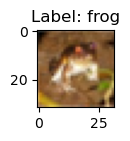

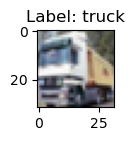

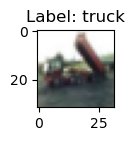

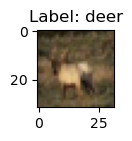

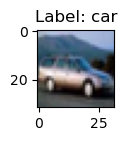

In [7]:
# Display a few images before model development, Hint - plt.title(f"Label: {y_train[i].argmax()}") will give you True Label.
#
#
# Your code to display a few images before the model development.
#
#
for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {classes[y_train[i][0]]}")
    plt.show()

In [8]:
# Preprocess the data

X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test, 10)

### MLP model

In [9]:
# Create an MLP model using Keras

mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=X_train.shape[1:]))
mlp_model.add(Dense(512, activation='relu'))
mlp_model.add(Dense(256, activation='relu'))
mlp_model.add(Dense(10, activation='softmax'))

# print the MLP model

print(mlp_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707274 (6.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train and evaluate the MLP classifier

history = mlp_model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8702 - accuracy: 0.3228
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6787 - accuracy: 0.3968
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5909 - accuracy: 0.4309
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5389 - accuracy: 0.4489
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5010 - accuracy: 0.4637
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4707 - accuracy: 0.4755
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4461 - accuracy: 0.4839
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4260 - accuracy: 0.4897
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4039 - accuracy: 0.4977
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

/var/folders/td/mycx_3nj06vf0dbwhg28gzxh0000gn/T/ipykernel_10012/256823875.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


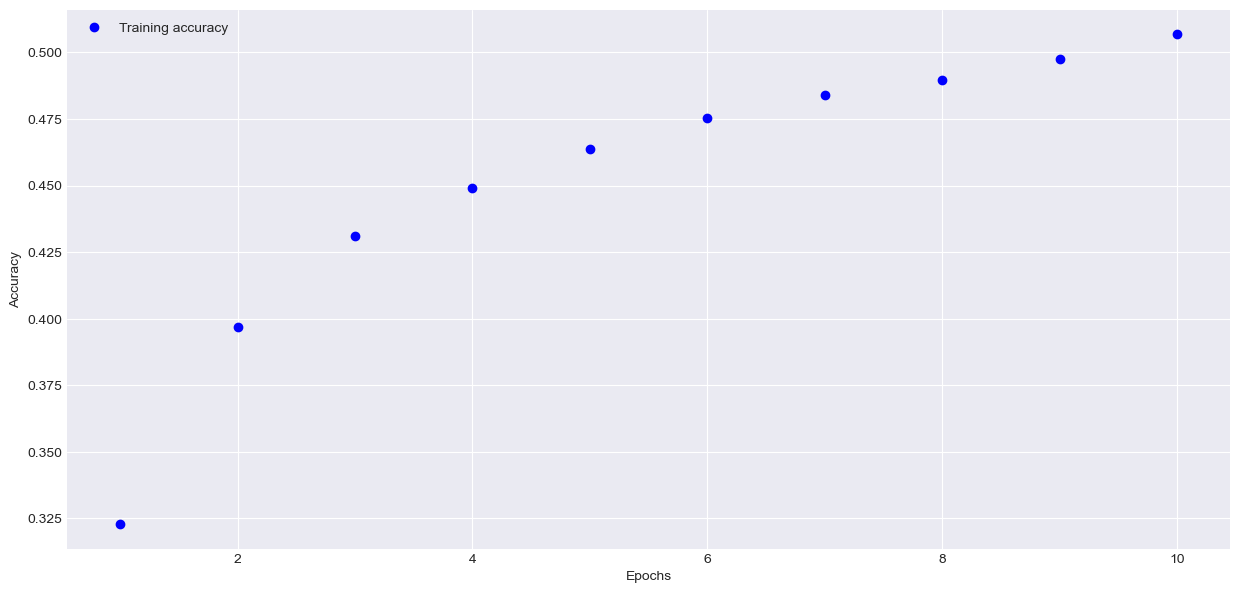

In [25]:
 # Print the training process graph and result 

history_dict = history.history
plt.style.use('seaborn-darkgrid') 

acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
# evaluation - Accuracy result on the Test set

mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test, verbose=0)
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}%")

MLP Test Accuracy: 48.41%


### CNN model

In [15]:
# Create a CNN model using Keras

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

# print the CNN model

print(cnn_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [16]:
# compilation

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train and evaluate the CNN classifier

history2 = cnn_model.fit(X_train, y_train, epochs=10, verbose = 1)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5666 - accuracy: 0.4253
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1879 - accuracy: 0.5805
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0376 - accuracy: 0.6343
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.9550 - accuracy: 0.6648
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8867 - accuracy: 0.6893
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8335 - accuracy: 0.7072
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7900 - accuracy: 0.7238
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7511 - accuracy: 0.7363
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7179 - accuracy: 0.7475
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

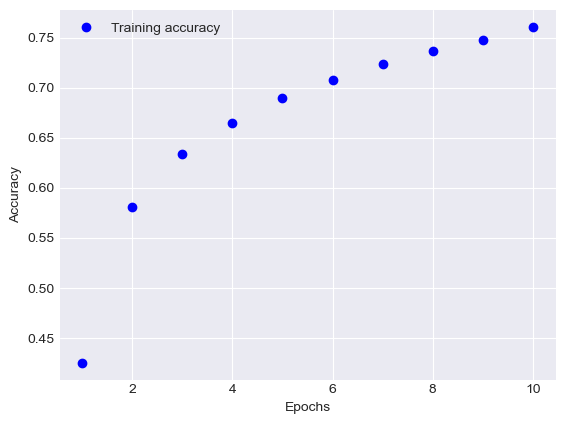

CNN Test Accuracy: 70.82%


In [21]:
# Your code to print the CNN training process graph and result 
#
#
#
history_dict = history2.history
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")


In [22]:
# evaluation - Accuracy result on the Test set

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy * 100:.2f}%")

CNN Test Accuracy: 70.82%


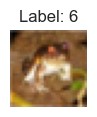

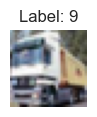

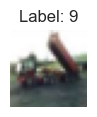

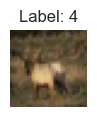

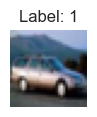

In [23]:
# Display a few images after CNN model development

for i in range(5):
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i].argmax()}")
    plt.axis('off')
    plt.show()



Based on the aforementioned code, perform the following activity:


1.   Using the provided code, create one distinct CNN models with architectures different from the one provided.


2.  Train the model with three different optimizers selected from the options available at https://keras.io/api/optimizers/.

3.  Measure the time it takes to train each model with its respective optimizer by importing the 'time' module and recording the start and end times using 'time.time()'.

4. Include this bar plot in your lab logbook to compare training times with different optimizers.

5. Strive to fine-tune the model parameters to achieve higher accuracy, ideally surpassing 90%. Document in your lab logbook the highest accuracy you have achieved through this fine-tuning process.

In [34]:
# Your code to do the above activity.
# Hint - import time
#
#
import time
from keras.optimizers import SGD, Adam, RMSprop

In [50]:
# Your code to do the above activity.
# Hint - Put name of optimizers 
#
#
cnn_model2 = Sequential()

cnn_model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn_model2.add(MaxPooling2D((2, 2)))

cnn_model2.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))

cnn_model2.add(Conv2D(128, (3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D((2, 2)))

cnn_model2.add(Flatten())

cnn_model2.add(Dense(128, activation='relu'))
cnn_model2.add(Dense(10, activation='softmax'))


In [51]:
# Your code to do the above activity.
# Hint - Store training time and accuracy in lists
#
#
training_times = []
accuracies = []

In [52]:
# Your code to do the above activity.
# Hint - import time and use time.time() just before and after training to record start and end time of the training. Difference will provide the training time.
#
#
#
optimizers = [SGD(), Adam(), RMSprop()]


In [53]:
# Your code to do the above activity.
# Hint - use loops for use different optimizers

for optimizer in optimizers:
    cnn_model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Measure training time
    start_time = time.time()
    history = cnn_model2.fit(X_train, y_train, epochs=3, verbose=0)
    end_time = time.time()
    training_time = end_time - start_time
    training_times.append(training_time)
    
    # Evaluate the model
    loss, accuracy = cnn_model2.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)
    
    

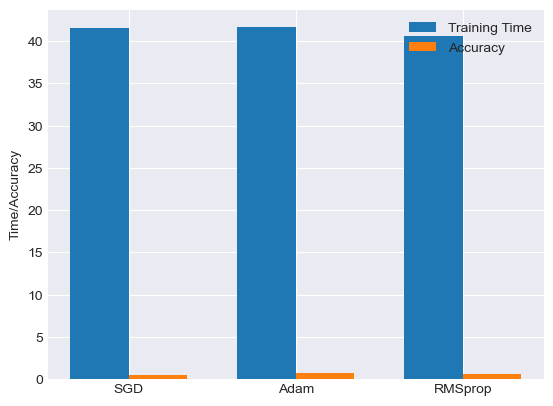

In [54]:
# Your code to do the above activity.
# Generate a bar plot to compare training times
#
#
x = np.arange(len(optimizers))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_times, width, label='Training Time')
rects2 = ax.bar(x + width/2, accuracies, width, label='Accuracy')

ax.set_ylabel('Time/Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(['SGD', 'Adam', 'RMSprop'])
ax.legend()

plt.show()

Lab Logbook Requirements:

1. Record the bar graph depicting the comparison of training times.
2. Record the final accuracy achieved.


In [55]:
# Print accuracies achieved with different optimizers

for i, optimizer in enumerate(optimizers):
    print(f"{optimizer} Optimizer - Test Accuracy: {accuracies[i] * 100:.2f}%")

<keras.src.optimizers.sgd.SGD object at 0x295f1a150> Optimizer - Test Accuracy: 47.85%
<keras.src.optimizers.adam.Adam object at 0x17f476390> Optimizer - Test Accuracy: 68.24%
<keras.src.optimizers.rmsprop.RMSprop object at 0x295f1b5d0> Optimizer - Test Accuracy: 65.03%


In [56]:
# Your code to
# Find and print the highest achieved accuracy
#
highest_accuracy = max(accuracies)
print(f"Highest Accuracy: {highest_accuracy * 100:.2f}%")

Highest Accuracy: 68.24%
